<a href="https://colab.research.google.com/github/priyarameshd/Ensemble_learningmethod/blob/main/XGBM_LGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# First XGBoost model for Pima Indians dataset
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [2]:
titanic_test = read_csv('Titanic_test.csv')
titanic_train = read_csv('Titanic_train.csv')

In [3]:
titanic_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
titanic_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### EDA

In [6]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
titanic_train['Age'].fillna(titanic_train['Age'].mean(),inplace=True)
titanic_test['Age'].fillna(titanic_test['Age'].mean(),inplace=True)
titanic_test['Fare'].fillna(titanic_test['Fare'].mean(),inplace=True)

In [9]:
titanic_train.fillna('', inplace=True)

In [10]:
titanic_test.fillna('', inplace=True)

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

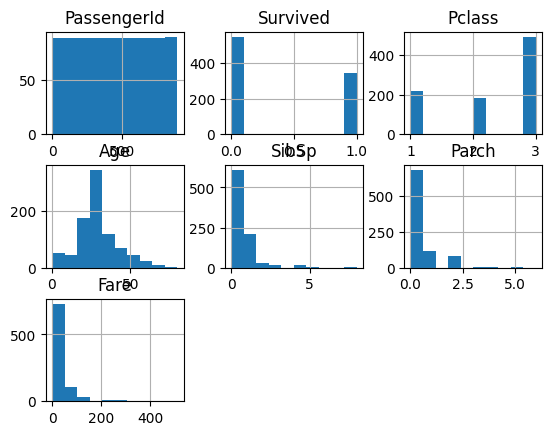

In [11]:
titanic_train.hist()

<Axes: >

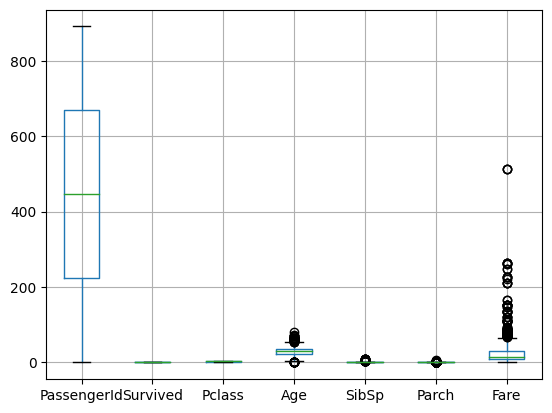

In [12]:
titanic_train.boxplot()

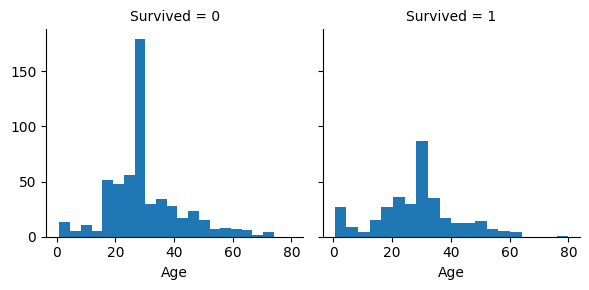

In [13]:
gr = sns.FacetGrid(titanic_train, col='Survived')
gr.map(plt.hist, 'Age', bins=20)

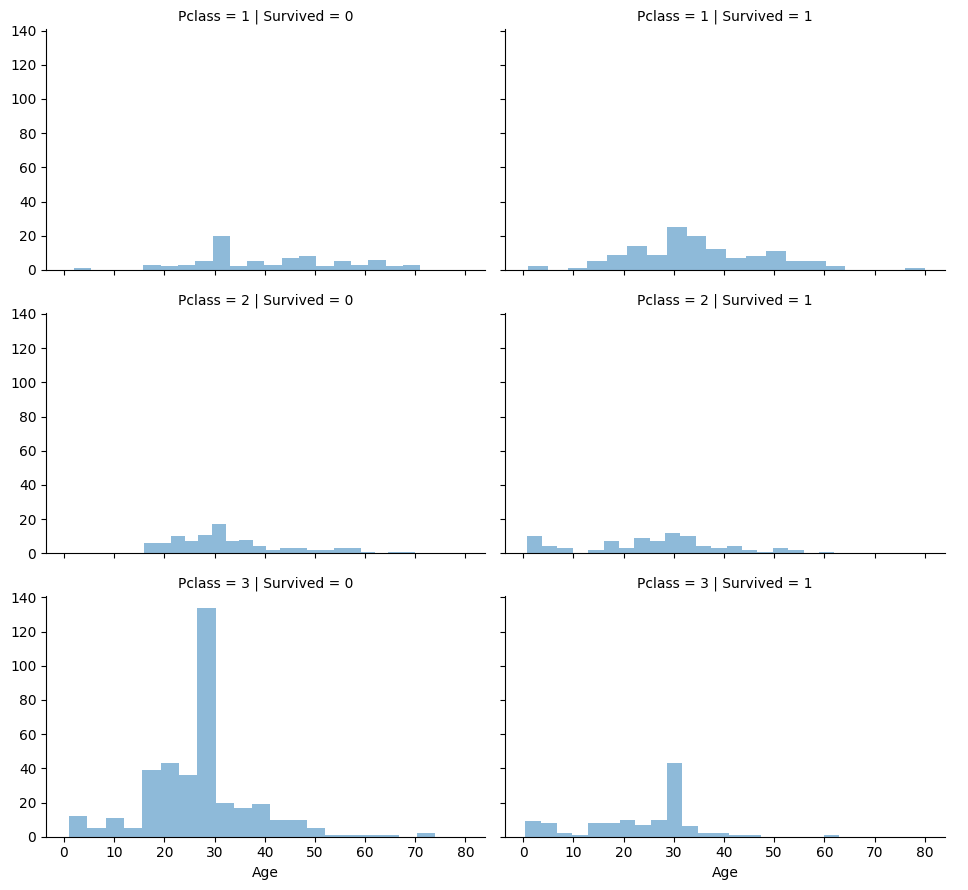

In [14]:
grid = sns.FacetGrid(titanic_train, col='Survived', row='Pclass', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

<Axes: xlabel='Pclass', ylabel='count'>

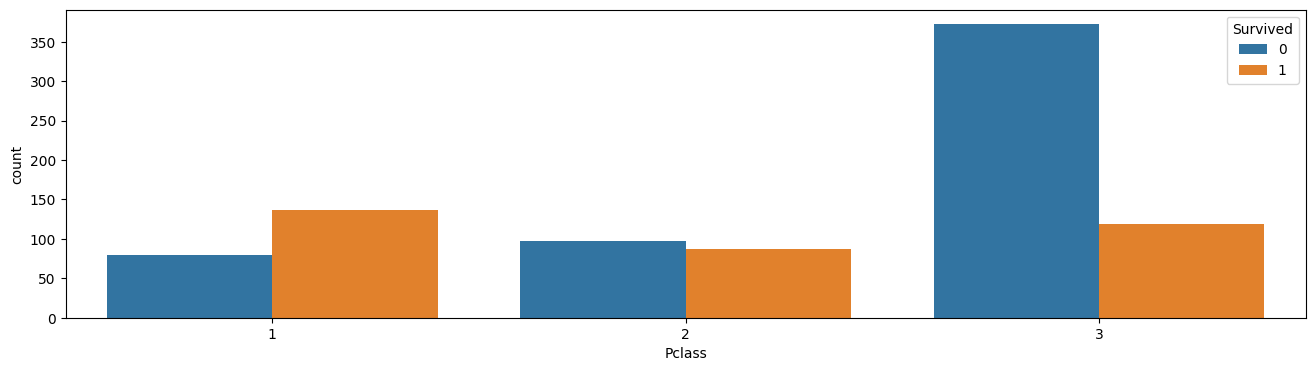

In [15]:
plt.figure(figsize=(16,4))
sns.countplot(data=titanic_train, x='Pclass', hue='Survived')

More people survived from class 1 comparing all classes. but class2 survival rate is better when comparing to the total number of passengers in corresponding class.

<Axes: xlabel='SibSp', ylabel='count'>

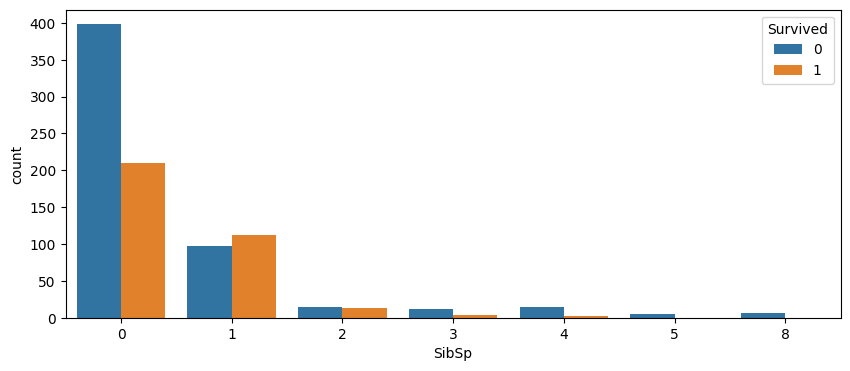

In [16]:
plt.figure(figsize=(10,4))
sns.countplot(data=titanic_train, x='SibSp', hue='Survived')

sibsp 0 is showing better survival nuber comparing to others but survival rate of sibsp 1 is good.

<Axes: xlabel='Parch', ylabel='count'>

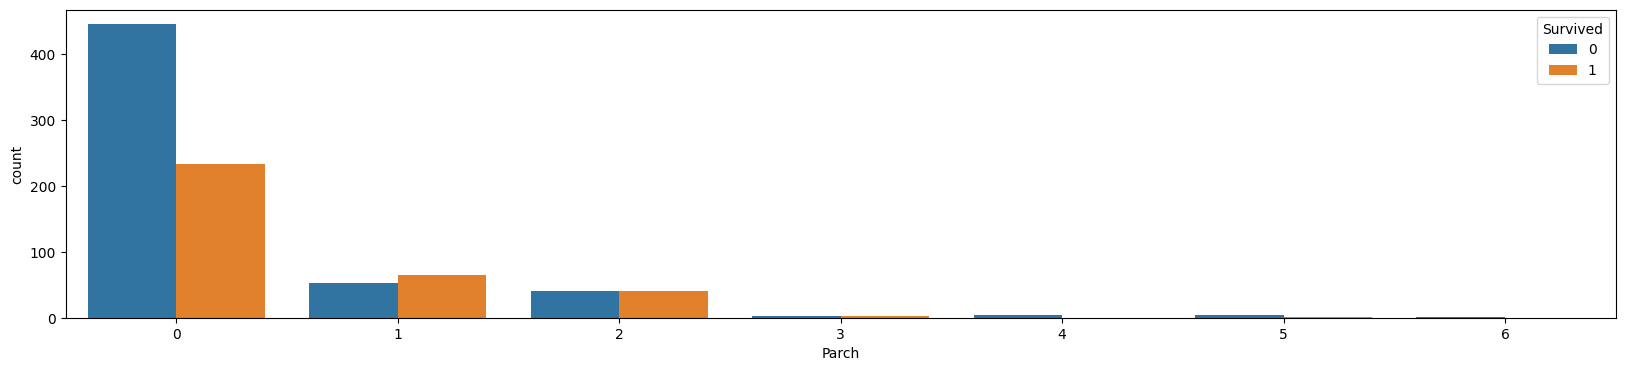

In [17]:
plt.figure(figsize=(20,4))
sns.countplot(data=titanic_train, x='Parch', hue='Survived')

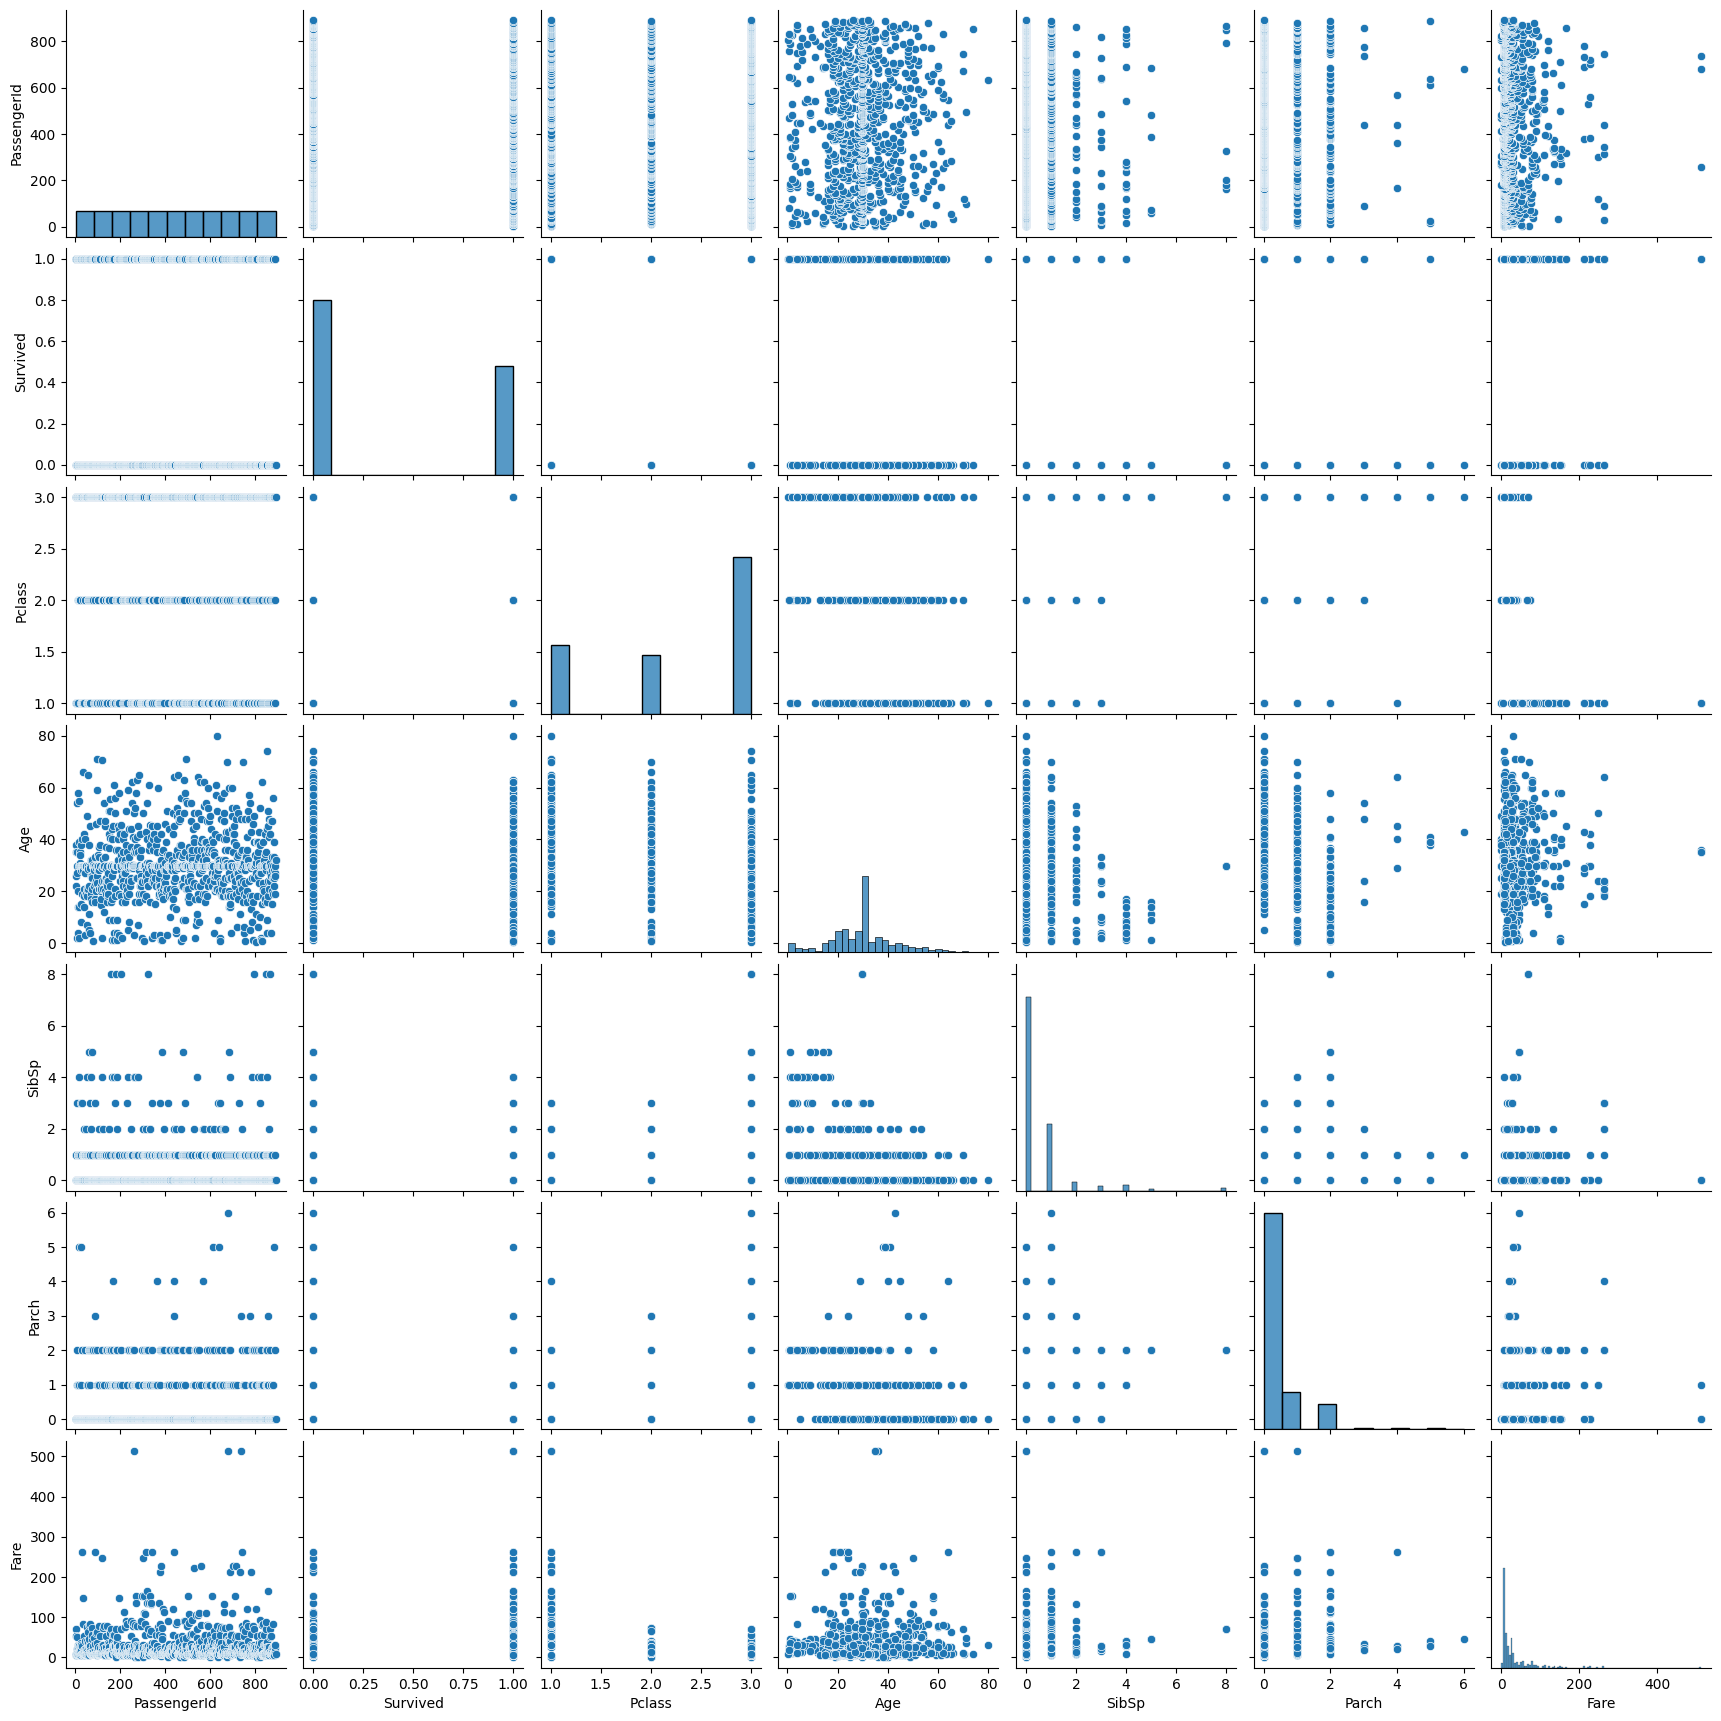

In [18]:
sns.pairplot(titanic_train)

There is no multi colinearity between variables.

<Axes: >

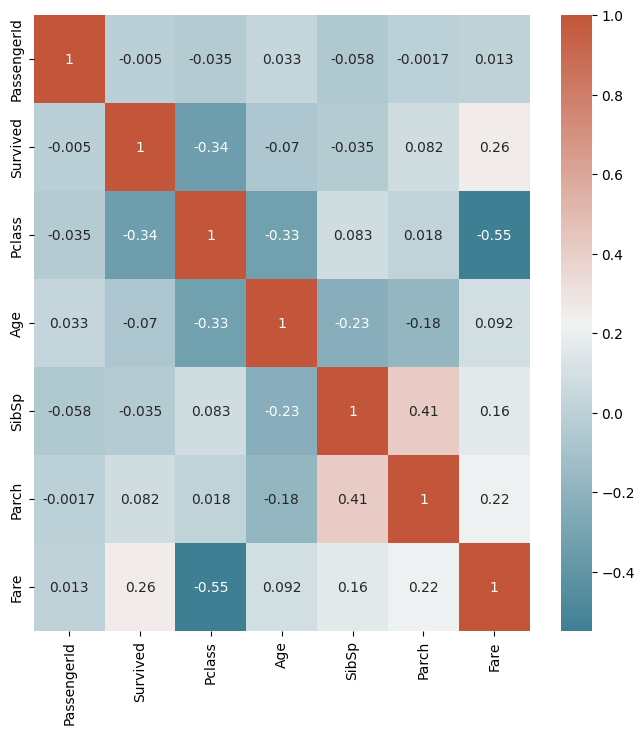

In [19]:
corr=titanic_train.corr(numeric_only=True)
plt.subplots(figsize=(8,8))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True,cmap=sns.diverging_palette(220,20,as_cmap=True))

### Data Preprocessing

Feature Engineering

Instead of name new feature title is created which contais title from name.

In [20]:
# Regular expression to get the title of the Name
titanic_train['title'] = titanic_train.Name.str.extract('\, ([A-Z][^ ]*\.)',expand=False)
titanic_test['title'] = titanic_test.Name.str.extract('\, ([A-Z][^ ]*\.)',expand=False)

In [21]:
titanic_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.


In [22]:
titanic_train['title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.', nan,
       'Jonkheer.'], dtype=object)

Drop the columns which is not necessary

In [23]:
titanic_train.drop(columns=['PassengerId','Name','Ticket'], axis=1, inplace=True)
titanic_test.drop(columns=['Name','Ticket'], axis=1, inplace=True)

In [24]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Cabin        418 non-null    object 
 8   Embarked     418 non-null    object 
 9   title        418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


**Encoding Technique**

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def encode_col(df):
  columns = ['Sex', 'Embarked', 'Cabin','title']

  for col in columns:
    le.fit(df[col])
    df[col] = le.transform(df[col])
  return df


In [26]:
titanic_train = encode_col(titanic_train)
titanic_test = encode_col(titanic_test)

In [27]:
titanic_train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,title
0,0,3,1,22.0,1,0,7.2500,0,3,11
1,1,1,0,38.0,1,0,71.2833,82,1,12


Split training and testing data set.

In [28]:
X=titanic_train.drop('Survived',axis=1)
Y=titanic_train['Survived']

In [29]:
# split data into train and test sets
seed = 42
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

### XGBM

In [30]:
# fit model no training data
model = XGBClassifier(max_depth =6, n_estimators=500, learning_rate=0.03,gamma=0.5, objective='binary:logistic')
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [31]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [32]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f" % (accuracy * 100.0))

Accuracy: 81.36


**Hyperparameter Tuning**

In [33]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

In [34]:
model = XGBClassifier()
random_grid = { 'eta': [x for x in np.linspace(start=0.01, stop=0.2, num=4)],
               'max_depth': range(1,10,1),
               'min_child_weight': range(1,13,2),
               'gamma': [i/10.0 for i in range (0,5)],
               'subsample': [i/100.0 for i in range (60, 100, 5)],
               'colsample_bytree': [i/100.0 for i in range (60, 100, 5)],
               'reg_alpha': [0, 0.001, 0.005, 0.01, 0.05]
              }

In [35]:
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, cv = 4)
rf_random.fit(X_train, y_train)
print(rf_random.best_score_)
rf_random.best_params_

0.825503355704698


{'subsample': 0.65,
 'reg_alpha': 0.001,
 'min_child_weight': 1,
 'max_depth': 9,
 'gamma': 0.2,
 'eta': 0.01,
 'colsample_bytree': 0.95}

Accuracy increased from 81 to 82.5% after hyperparameter tuning.

In [49]:
# fit model no training data
model = XGBClassifier(subsample= 0.6,
 reg_alpha= 0.005,
 min_child_weight = 1,
 max_depth = 3,
 gamma= 0.0,
 eta= 0.2,
 colsample_bytree= 0.9)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.2, eval_metric=None,
              feature_types=None, gamma=0.0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
print('F1 score =',(f1_score(y_test, y_pred) * 100))
print('Precision score =',(precision_score(y_test, y_pred) * 100))
print('Recall score =',(recall_score(y_test, y_pred) * 100))

Accuracy = 81.35593220338984
F1 score = 75.33632286995517
Precision score = 81.55339805825243
Recall score = 70.0


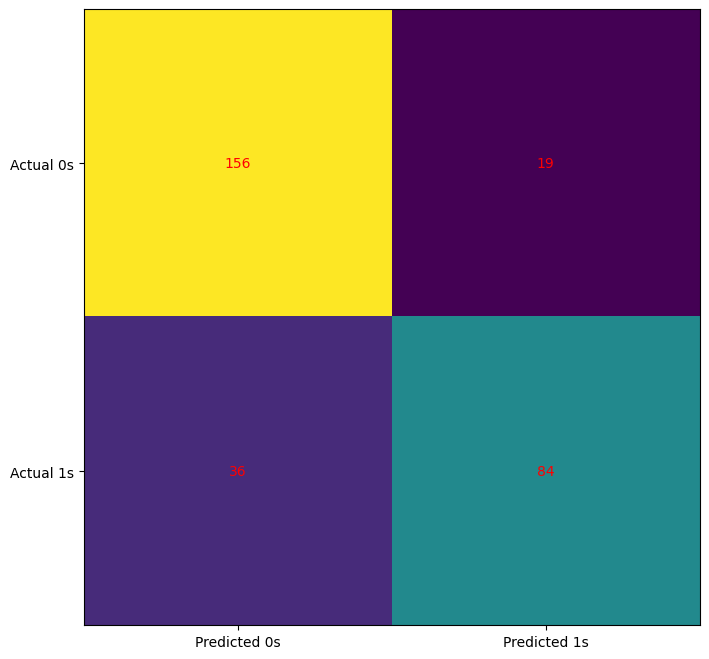

In [51]:
# Confusion Matrix visualization
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

**Preiction using Test data**

In [52]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Cabin        418 non-null    int64  
 8   Embarked     418 non-null    int64  
 9   title        418 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 32.8 KB


In [53]:
x_test = titanic_test.drop('PassengerId',axis=1)

In [54]:
# make predictions for test data
y_pred_xg = model.predict(x_test)
predictions = [round(value) for value in y_pred_xg]

In [55]:
submission = pd.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": y_pred_xg
    })



submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


<Axes: >

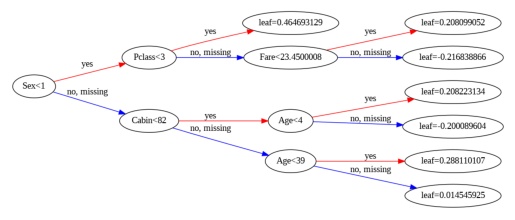

In [56]:
from xgboost import plot_tree
plot_tree(model, num_trees=0, rankdir='LR')

***Light GBM***

In [57]:
import lightgbm as lgb
d_train = lgb.Dataset(X_train, label=y_train)

In [58]:
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10

In [59]:
clf = lgb.train(params, d_train, 500)

[LightGBM] [Info] Number of positive: 222, number of negative: 374
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000317 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 237
[LightGBM] [Info] Number of data points in the train set: 596, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.372483 -> initscore=-0.521578
[LightGBM] [Info] Start training from score -0.521578
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [60]:
#Prediction
y_pred=clf.predict(X_test)
predictions = [round(value) for value in y_pred]

In [61]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7932203389830509

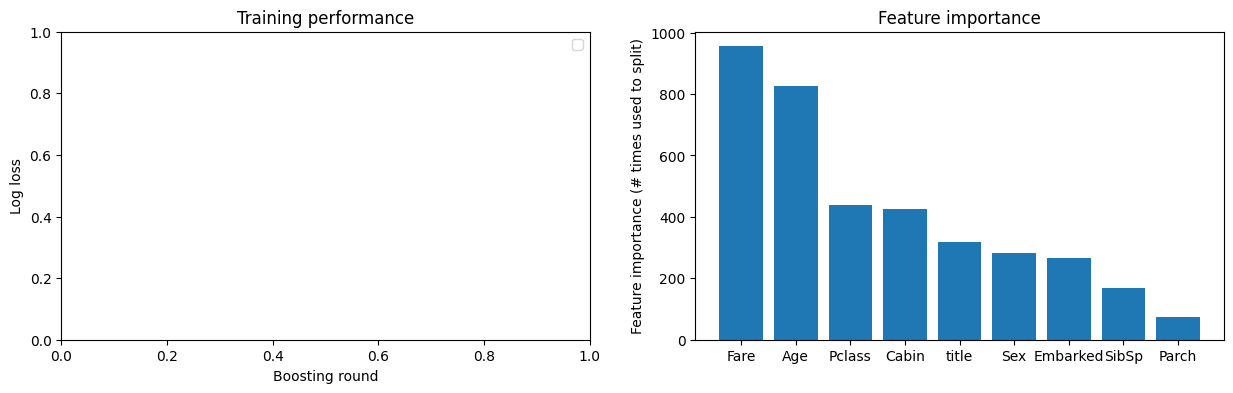

In [62]:
fig, axs = plt.subplots(1, 2, figsize=[15, 4])

# Plot the log loss during training
# axs[0].plot(evaluation_results['Train']['binary_logloss'], label='Train')
# axs[0].plot(evaluation_results['Test']['binary_logloss'], label='Test')
axs[0].set_ylabel('Log loss')
axs[0].set_xlabel('Boosting round')
axs[0].set_title('Training performance')
axs[0].legend()

# Plot feature importance
importances = pd.DataFrame({'features': clf.feature_name(),
                            'importance': clf.feature_importance()}).sort_values('importance', ascending=False)
axs[1].bar(x=np.arange(len(importances)), height=importances['importance'])
axs[1].set_xticks(np.arange(len(importances)))
axs[1].set_xticklabels(importances['features'])
axs[1].set_ylabel('Feature importance (# times used to split)')
axs[1].set_title('Feature importance')

plt.show()


In [63]:

preds = np.round(clf.predict(X_test))
print('Accuracy score   \t {}'.format(accuracy_score(y_test, preds)))
print('Precision score  \t {}'.format(precision_score(y_test, preds)))
print('Recall score     \t {}'.format(recall_score(y_test, preds)))
print('F1 score         \t {}'.format(f1_score(y_test, preds)))

Accuracy score   	 0.7932203389830509
Precision score  	 0.8554216867469879
Recall score     	 0.5916666666666667
F1 score         	 0.6995073891625616


In [64]:
x_test = titanic_test.drop('PassengerId',axis=1)


In [65]:
y_pred_test=clf.predict(x_test)
predictions_test = [round(value) for value in y_pred_test]

In [66]:
output_df = pd.DataFrame({'PassengerId': titanic_test['PassengerId'], 'Survived': predictions_test})

In [67]:
output_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


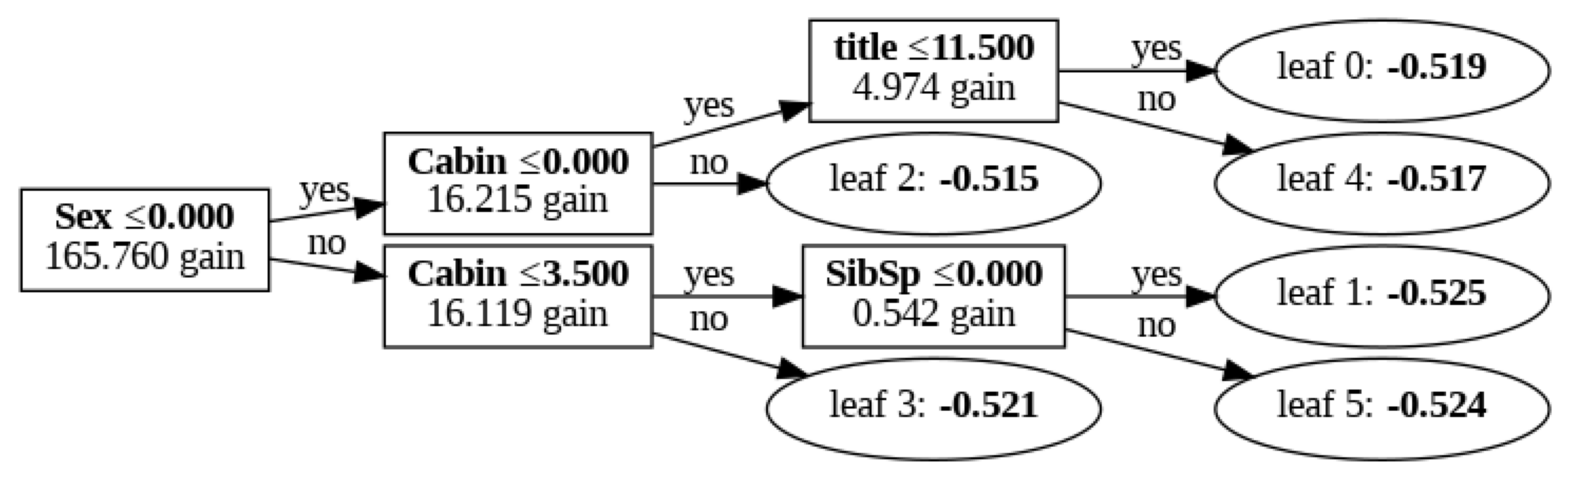

In [68]:
# Plot the tree
ax = lgb.plot_tree(clf, tree_index=0, figsize=(20, 10), show_info=['split_gain'])
plt.show()

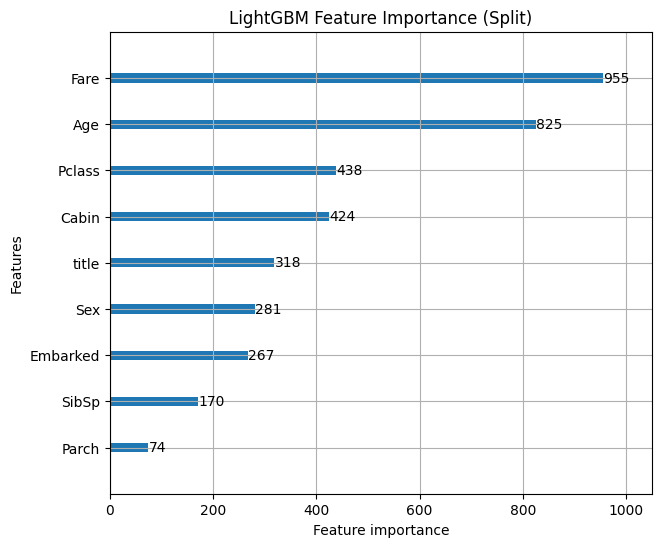

In [69]:
# Plot feature importance using Split
lgb.plot_importance(clf, importance_type="split", figsize=(7,6), title="LightGBM Feature Importance (Split)")
plt.show()

Performance Metrics: XGBoost model show better accuracy and F1-scores on this dataset.

Training Speed: LightGBM is likely to train faster, especially on larger datasets.

Model Interpretability: Both models provide useful tools for interpretation, with XGBoost potentially being slightly more user-friendly.